In [1]:
%matplotlib inline

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sns.set(style='ticks', palette='Set2')

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [18]:
url = 'http://www.federacioneditores.org/SectorEdit/DatosEstadisticos.asp'
data = pd.read_html('http://www.federacioneditores.org/SectorEdit/DatosEstadisticos.asp', skiprows=16, header=0, index_col=0)[0]

In [19]:
data

,Año 2005,Año 2006,Año 2007,Año 2008,Año 2009,Año 2010,Año 2011,Año 2012,Año 2013,Unnamed: 10,...,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256
Número de agentes editoriales privados,2.781,2.673,2.803,2.892,3.032,2.994,2.988,2.835,2.750,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Número de agentes editoriales públicos,615,563,597,580,532,529,476,352,336,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Porcentaje de la producción editorial de instituciones públicas (títulos inscritos en ISBN),"11,5%","12,3%","11,2%","9,8%","8,6%","8,0%","7,0%","7,5%",9%,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ISBN concedidos,76.265,77.330,82.559,104.223,110.205,114.205,111.907,104.724,89.130,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Títulos vivos en catálogo,325.808,346.706,369.588,393.012,414.727,439.991,464.981,490.752,524.213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Títulos editados en edición de bolsillo,5.378,5.232,6.392,6.608,6.425,6.001,5.376,4.806,4.099,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ejemplares editados,321.469.155,338.086.000,357.560.000,367.460.000,329.830.000,302.631.000,286.462.000,280.251.000,246.345.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ejemplares vendidos,230.626.086,228.220.878,250.860.500,240.660.000,236.197.000,228.230.000,199.814.000,170.237.000,153.830.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Porcentaje de títulos que son traducciones de otros idiomas distintos al español,"25,8%","28,02%","24,7%","24,8%","22,9%","22,1%","21,1%","22,0%","22,3%",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valor de las ventas de libros en el mercado interior (millones de euros),2.93320,3.01454,3.12317,3.18550,3.10958,2.89080,2.77234,2.47149,2.18197,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
data.dropna(how='all', inplace=True)

In [22]:
data.dropna(how='all', inplace=True, axis=1)

In [23]:
data.head()

,Año 2005,Año 2006,Año 2007,Año 2008,Año 2009,Año 2010,Año 2011,Año 2012,Año 2013
Número de agentes editoriales privados,2.781,2.673,2.803,2.892,3.032,2.994,2.988,2.835,2.750
Número de agentes editoriales públicos,615,563,597,580,532,529,476,352,336
Porcentaje de la producción editorial de instituciones públicas (títulos inscritos en ISBN),"11,5%","12,3%","11,2%","9,8%","8,6%","8,0%","7,0%","7,5%",9%
ISBN concedidos,76.265,77.330,82.559,104.223,110.205,114.205,111.907,104.724,89.130
Títulos vivos en catálogo,325.808,346.706,369.588,393.012,414.727,439.991,464.981,490.752,524.213


In [30]:
data.index[7]

'Ejemplares vendidos'

In [31]:
vtas = data.loc[_]

In [41]:
quitar_punto = lambda x: int(x.replace('.', ''))

In [45]:
vtas = vtas.map(quitar_punto)

In [74]:
pie = 'Fuente: La Federación de Gremios de Editores de España\nMaximiliano | @mmngreco' 

In [72]:
horizontal = np.linspace(0, 2 * 10 ** 8, 5)

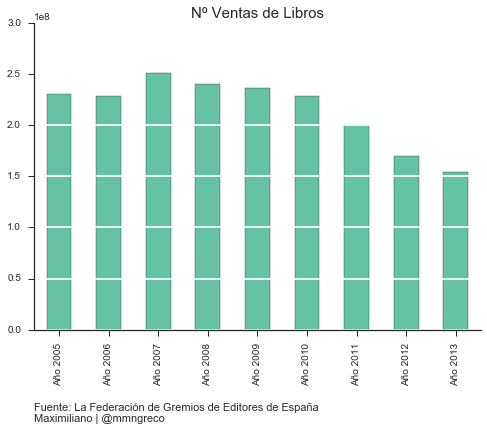

In [76]:
ax = vtas.plot(kind='bar', colormap='Set2')

for line in horizontal:
    plt.axhline(line, color='white')

sns.despine()

ax = plt.gca()
plt.title('Nº de Libros Vendidos', fontsize=15)
plt.text(0,-0.3, pie, fontsize=11, transform=ax.transAxes)

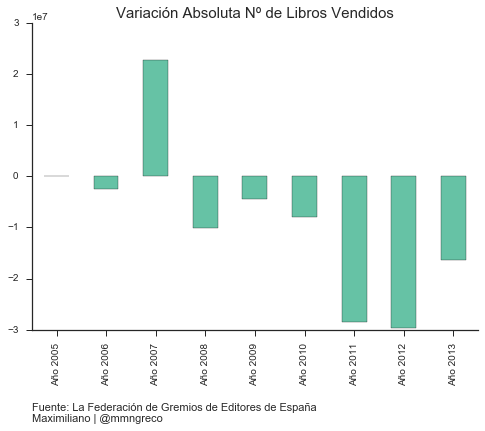

In [80]:
ax = vtas.diff().plot(kind='bar', colormap='Set2')
sns.despine()

ax = plt.gca()
plt.title('Variación Absoluta Nº de Libros Vendidos', fontsize=15)
plt.text(0,-0.3, pie, fontsize=11, transform=ax.transAxes)

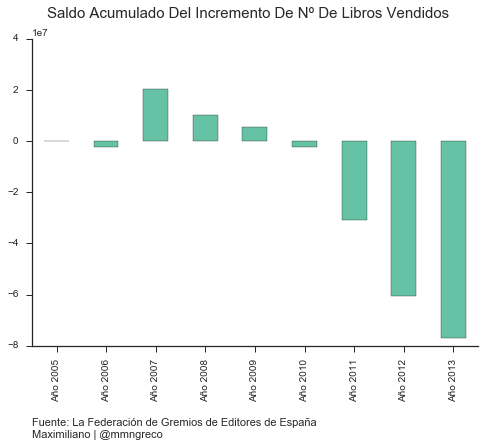

In [85]:
ax = vtas.diff().cumsum().plot(kind='bar', colormap='Set2')

sns.despine()

ax = plt.gca()
plt.suptitle('SALDO ACUMULADO DEL INCREMENTO DE Nº DE LIBROS VENDIDOS'.title(), fontsize=15, )
plt.text(0,-0.3, pie, fontsize=11, transform=ax.transAxes)